In [1]:
import pandas as pd

In [2]:
# Optional display settings for better notebook formatting
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', 10)       # Limit number of rows shown
pd.set_option('display.width', 1000)        # Width of the display in characters

In [3]:
Train = pd.read_csv('Train-1542865627584.csv')  # 5,410 rows, Provider fraud labels
Beneficiary = pd.read_csv('Train_Beneficiarydata-1542865627584.csv')  # 138,556 rows, Patient info
Inpatient = pd.read_csv('Train_Inpatientdata-1542865627584.csv')  # 40,474 rows, Hospital stays
Outpatient = pd.read_csv('Train_Outpatientdata-1542865627584.csv')  # 517,737 rows, Outpatient visits

In [4]:
# Get unique BeneID-Provider  from Inpatient data
IP_Ben_Provider = Inpatient[['BeneID', 'Provider']].drop_duplicates()
IP_Ben_Provider

,BeneID,Provider
0,BENE11001,PRV55912
1,BENE11001,PRV55907
2,BENE11001,PRV56046
3,BENE11011,PRV52405
4,BENE11014,PRV56614
...,...,...
40468,BENE159167,PRV53671
40470,BENE159175,PRV54981
40471,BENE159177,PRV56588
40472,BENE159177,PRV56575


In [5]:
# Get unique BeneID-Provider  from Outpatient data
OP_Ben_Provider = Outpatient[['BeneID', 'Provider']].drop_duplicates()
OP_Ben_Provider

,BeneID,Provider
0,BENE11002,PRV56011
1,BENE11003,PRV57610
2,BENE11003,PRV57595
3,BENE11004,PRV56011
10,BENE11004,PRV55951
...,...,...
517726,BENE159198,PRV53672
517728,BENE159198,PRV53699
517729,BENE159198,PRV53670
517733,BENE159198,PRV53702


In [6]:
All_Ben_Provider= pd.concat([IP_Ben_Provider,OP_Ben_Provider]).drop_duplicates()
All_Ben_Provider

,BeneID,Provider
0,BENE11001,PRV55912
1,BENE11001,PRV55907
2,BENE11001,PRV56046
3,BENE11011,PRV52405
4,BENE11014,PRV56614
...,...,...
517726,BENE159198,PRV53672
517728,BENE159198,PRV53699
517729,BENE159198,PRV53670
517733,BENE159198,PRV53702


In [7]:
# Calculate Beneficiary Deductible sum from Inpatient
Bene_IP_decutible_total= Beneficiary['IPAnnualDeductibleAmt'].sum()
Bene_IP_decutible_total

55401242

In [8]:
# Calculate Beneficiary Deductible sum from Outpatient
Bene_OP_decutible_total= Beneficiary['OPAnnualDeductibleAmt'].sum()
Bene_OP_decutible_total

52335131

In [9]:
# Join Beneficiary data with all_Ben_provider
Ben_Provider= All_Ben_Provider.merge(Beneficiary[['BeneID','IPAnnualDeductibleAmt','OPAnnualDeductibleAmt']], on='BeneID',how='left')

In [10]:
Ben_Provider

,BeneID,Provider,IPAnnualDeductibleAmt,OPAnnualDeductibleAmt
0,BENE11001,PRV55912,3204,70
1,BENE11001,PRV55907,3204,70
2,BENE11001,PRV56046,3204,70
3,BENE11011,PRV52405,1068,320
4,BENE11014,PRV56614,2136,100
...,...,...,...,...
363295,BENE159198,PRV53672,0,1870
363296,BENE159198,PRV53699,0,1870
363297,BENE159198,PRV53670,0,1870
363298,BENE159198,PRV53702,0,1870


In [11]:
Avg_deductibles = Ben_Provider.groupby('Provider')[['IPAnnualDeductibleAmt', 'OPAnnualDeductibleAmt']].mean().reset_index().round()
Avg_deductibles

,Provider,IPAnnualDeductibleAmt,OPAnnualDeductibleAmt
0,PRV51001,890.0,475.0
1,PRV51003,823.0,665.0
2,PRV51004,454.0,601.0
3,PRV51005,399.0,476.0
4,PRV51007,424.0,431.0
...,...,...,...
5405,PRV57759,445.0,755.0
5406,PRV57760,237.0,832.0
5407,PRV57761,574.0,631.0
5408,PRV57762,1068.0,400.0


In [12]:
df_all= pd.merge(
    Train,
    Avg_deductibles,
    on='Provider',
    how='left'    
)

In [13]:
df_all

,Provider,PotentialFraud,IPAnnualDeductibleAmt,OPAnnualDeductibleAmt
0,PRV51001,No,890.0,475.0
1,PRV51003,Yes,823.0,665.0
2,PRV51004,No,454.0,601.0
3,PRV51005,Yes,399.0,476.0
4,PRV51007,No,424.0,431.0
...,...,...,...,...
5405,PRV57759,No,445.0,755.0
5406,PRV57760,No,237.0,832.0
5407,PRV57761,No,574.0,631.0
5408,PRV57762,No,1068.0,400.0


In [14]:
# Save final_df as a CSV file
df_all.to_csv("Merge_providerlevel_deductible.csv", index=False)

<Figure size 1000x500 with 0 Axes>

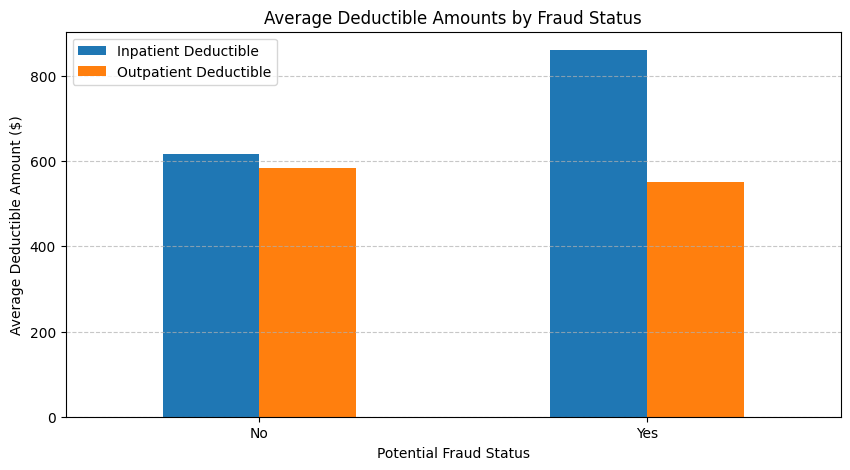

In [15]:
# Visualization
import matplotlib.pyplot as plt

# Grouping by PotentialFraud and calculating mean Deductible amounts
fraud_summary = df_all.groupby("PotentialFraud")[
    ["IPAnnualDeductibleAmt", "OPAnnualDeductibleAmt"]
].mean()

# Plotting Inpatient and Outpatient Reimbursement Comparisons
plt.figure(figsize=(10, 5))
fraud_summary.plot(kind="bar", figsize=(10, 5), rot=0)
plt.title("Average Deductible Amounts by Fraud Status")
plt.ylabel("Average Deductible Amount ($)")
plt.xlabel("Potential Fraud Status")
plt.xticks(rotation=0)
plt.legend(["Inpatient Deductible", "Outpatient Deductible"])
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

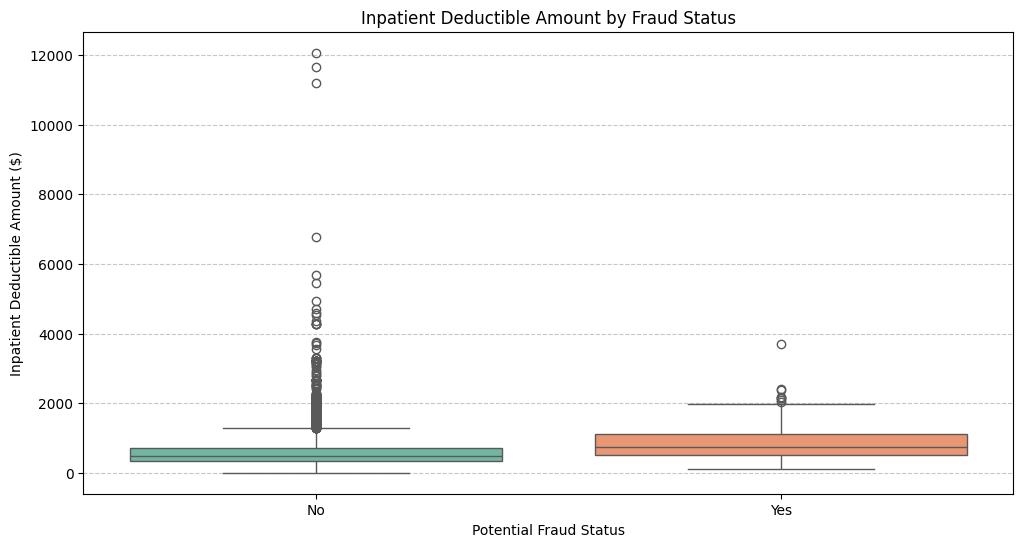

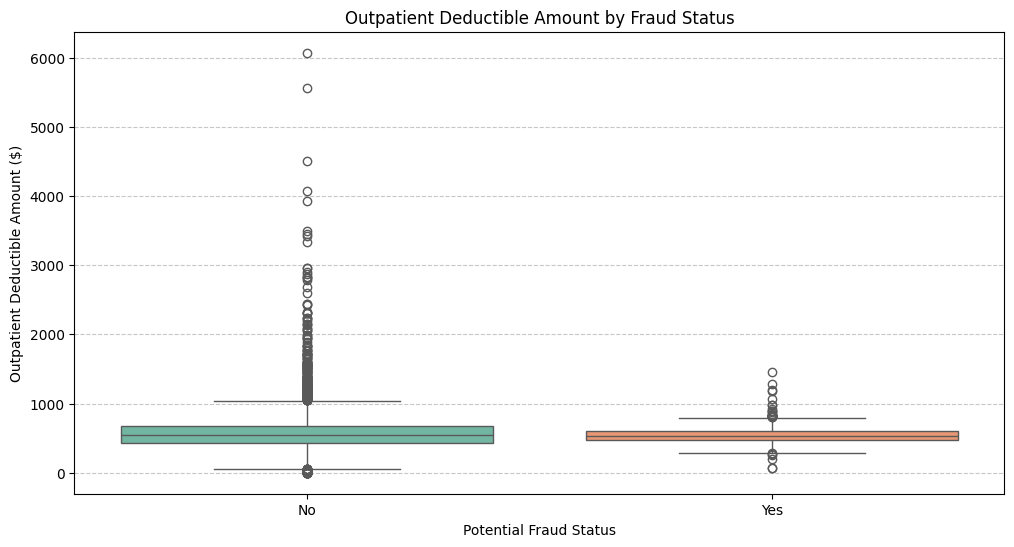

In [18]:
# Boxplot comparison of Inpatient and Outpatient deductible amounts by PotentialFraud status
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 6))

# Plotting Inpatient Deductible by PotentialFraud status
sns.boxplot(data=df_all, x='PotentialFraud', y='IPAnnualDeductibleAmt', hue='PotentialFraud', palette='Set2')
plt.title("Inpatient Deductible Amount by Fraud Status")
plt.ylabel("Inpatient Deductible Amount ($)")
plt.xlabel("Potential Fraud Status")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Plotting Outpatient Deductible by PotentialFraud status
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_all, x='PotentialFraud', y='OPAnnualDeductibleAmt', hue='PotentialFraud', palette='Set2')
plt.title("Outpatient Deductible Amount by Fraud Status")
plt.ylabel("Outpatient Deductible Amount ($)")
plt.xlabel("Potential Fraud Status")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()